In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils.load_csv import load_csv

In [2]:
gdf = load_csv("gdf_final.csv")

In [3]:
df_diesel = gdf[gdf["is_eletrico"] == False].copy()

In [4]:
def sim_monte_carlo(df_diesel, Y, N=2000, seed=42):
    
    np.random.seed(seed)

    resultados = [
        df_diesel.sample(n=Y, replace=False)["emissao_co2"].sum()
        for _ in range(N)
    ]

    impacto_medio = np.mean(resultados)

    impacto_maximo = df_diesel.nlargest(Y, "emissao_co2")["emissao_co2"].sum()
    
    impacto_diferenca = impacto_maximo - impacto_medio

    return {
        "Y": Y,
        "resultados": resultados,
        "impacto_medio": impacto_medio,
        "impacto_maximo": impacto_maximo,
        "impacto_diferenca": impacto_diferenca
    }

def sim_monte_carlo(df_diesel, Y, N=2000):

    resultados = [
        df_diesel.sample(n=Y, replace=False)["emissao_co2"].mean()
        for _ in range(N)
    ]

    impacto_medio = np.mean(resultados)
    impacto_maximo = df_diesel.nlargest(Y, "emissao_co2")["emissao_co2"].mean()
    impacto_diferenca = impacto_maximo - impacto_medio

    return {
        "Y": Y,
        "resultados": resultados,
        "impacto_medio": impacto_medio,
        "impacto_maximo": impacto_maximo,
        "impacto_diferenca": impacto_diferenca
    }

In [5]:
res = [sim_monte_carlo(df_diesel, y) for y in [50, 100, 200]]

In [6]:
for r in res:
    print(r['impacto_medio'], r['impacto_maximo'], r['impacto_diferenca'])

0.008131482823439055 1.5802804068846525 1.5721489240612134
0.016311269936244988 2.61569148792075 2.599380217984505
0.03249136829920887 3.939592210470119 3.90710084217091


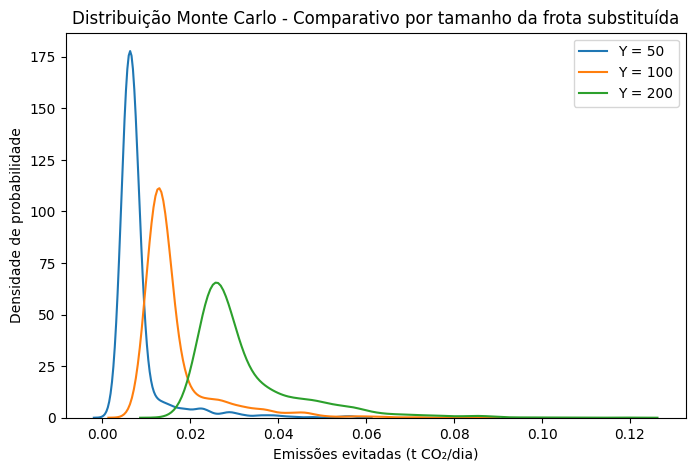

In [7]:
plt.figure(figsize=(8,5))

for r in res:

    sns.kdeplot(r["resultados"], label=f"Y = {r['Y']}")

plt.xlabel("Emissões evitadas (t CO₂/dia)")
plt.ylabel("Densidade de probabilidade")
plt.title("Distribuição Monte Carlo - Comparativo por tamanho da frota substituída")
plt.legend()
plt.show()